In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

### 1- Chargement des données 

In [3]:
dir_honoraire = "/home/parfait/Documents/MS BGD/INFMDI721_KIT_BigData/exo_sante/remoursement_secu_mensuel.csv"
honoraire = pd.read_csv(dir_honoraire, sep = ';', encoding='latin-1')
honoraire.head()

/home/parfait/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,l_serie,SERIE,prs_nat,l_prs_nat,rem_date,sns_date,asu_nat,l_asu_nat,cpl_cod,l_cpl_cod,...,l_exe_spe,exe_spe1,l_exe_spe1,exe_stj1,l_exe_stj1,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,201806,201805,1,Maladie,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,2,Salarié,"24,00","30,00","0,00",1.0,"1,00"
1,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,201807,201804,1,Maladie,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"72,00","90,00","0,00",3.0,"3,00"
2,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,201807,201804,1,Maladie,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"150,00","150,00","0,00",5.0,"5,00"
3,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,201807,201804,1,Maladie,2,Majoration de dimance et jour férié,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"0,00","0,00","0,00",0.0,"0,00"
4,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,201807,201804,1,Maladie,2,Majoration de dimance et jour férié,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"19,06","19,06","0,00",1.0,"0,00"


In [4]:
dir_densite = "/home/parfait/Documents/MS BGD/INFMDI721_KIT_BigData/exo_sante/rpps-medecins18-v2.csv"
densite = pd.read_csv(dir_densite, sep = ';')
densite.head()

,SPECIALITE,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
0,FRANCE ENTIERE,337.9,184.8,2.5,17.2,4.5,10.7,5.3,1.7,5.1,...,4.6,23.0,13.3,1.4,0.7,0.0,3.9,2.5,153.0,153.0
1,FRANCE M�tropolitaine,340.1,186.6,2.5,17.3,4.5,10.8,5.4,1.7,5.1,...,4.7,23.3,13.4,1.4,0.7,0.0,4.0,2.5,153.5,153.5
2,DROM,270.4,130.8,1.2,14.7,3.5,7.0,3.2,0.8,3.3,...,2.7,13.1,8.5,0.8,0.5,0.0,1.6,2.9,139.6,139.6
3,Auvergne-Rh�ne-Alpes,339.5,182.5,2.6,18.8,3.9,9.7,5.4,1.7,5.5,...,4.5,22.8,13.1,1.4,0.5,0.0,4.2,2.6,157.0,157.0
4,Bourgogne-Franche-Comt�,297.2,153.1,1.7,14.1,3.9,8.4,4.4,1.2,4.9,...,4.3,18.2,11.0,1.3,0.7,0.0,2.8,2.4,144.1,144.1


In [5]:
honoraire.shape

(205783, 28)

In [6]:
dir_corresp = "/home/parfait/Documents/MS BGD/INFMDI721_KIT_BigData/exo_sante/correspondance.csv"
corresp = pd.read_csv(dir_corresp, sep = ';')
corresp.head()

,PSP_SPE_SNDS,Libellé Spécialité Médicale PS Prescripteur
0,0,NON RENSEIGNE
1,1,MEDECINE GENERALE
2,2,ANESTHESIOLOGIE - REANIMATION
3,3,PATHOLOGIE CARDIO-VASCULAIRE
4,4,CHIRURGIE


### 2- Cleaning et reformatage data

In [7]:
#densite['exe_spe1'].unique
#densite.groupby('l_exe_spe1').sum()
honoraire.dtypes
honoraire['rem_mon'] = honoraire.rem_mon.str.replace(',', '.')
honoraire['rec_mon'] = honoraire.rec_mon.str.replace(',', '.')
honoraire['dep_mon'] = honoraire.dep_mon.str.replace(',', '.')

honoraire['rem_mon'] = pd.to_numeric(honoraire.rem_mon, errors='coerce')
honoraire['rec_mon'] = pd.to_numeric(honoraire.rec_mon, errors='coerce')
honoraire['dep_mon'] = pd.to_numeric(honoraire.dep_mon, errors='coerce')

honoraire['specialite_nom'] = honoraire.l_exe_spe.str.split('-').str[1]
honoraire['specialite_code'] = honoraire.l_exe_spe.str.split('-').str[0]


In [8]:
honoraireGroup = honoraire.groupby(['specialite_nom', 'specialite_code']).sum().reset_index()
honoraireGroup

,specialite_nom,specialite_code,prs_nat,rem_date,sns_date,asu_nat,cpl_cod,REM_TAU,pre_spe,pre_spe1,pre_stj1,exe_spe,exe_spe1,exe_stj1,rem_mon,rec_mon,dep_mon,act_dnb
0,Anatomie,37,830231,111598901,111559944,652,8,44591,22259,1309,582,20461,6636,582,27081.15,40799.42,19096.84,1.070227e+06
1,Anesthésiologie,02,3126042,502899063,502789508,3970,828,200769,30689,6839,2757,4984,29904,2757,226693.87,252744.88,87750.35,1.149642e+06
2,Chirurgie dentaire,19,6138475,880234376,879954897,5538,85,357135,229758,26628,6198,82878,178842,6196,544549.54,582126.23,240593.00,5.252389e+06
3,Chirurgie dentaire spécialistes,36,622045,96049584,96015556,507,16,39160,25641,2579,611,17136,19992,611,53937.09,54386.83,34274.88,1.963110e+05
4,Chirurgie générale,04,2473510,373141479,373081238,2463,501,146638,41684,6238,2209,7396,22188,2213,172274.92,206221.93,90435.90,2.351700e+05
5,Chirurgie infantile,43,380406,62964071,62956240,341,85,24316,13416,624,312,13416,3744,312,30123.78,33064.98,15409.79,1.012300e+04
6,Chirurgie maxillo,44,449370,67807350,67799622,362,45,25573,14784,672,336,14784,4032,336,25792.22,38182.49,21245.02,1.095200e+04
7,Chirurgie maxillo,45,1035609,156401079,156381849,822,87,58021,37035,1830,815,34875,9300,815,80618.35,92817.38,57291.44,5.597600e+04
8,Chirurgie orale dentaire,53,217949,33903726,33899087,180,0,13500,8950,677,169,8904,7056,169,19938.68,25471.34,10888.08,7.804000e+03
9,Chirurgie orale médicale,69,33308,4843390,4843370,24,0,1920,1656,48,24,1656,288,24,2891.84,2738.27,1872.08,1.400000e+02


In [9]:
#honoraireGroup.set_index(['specialite_nom', 'specialite_code']).T
honoraireGroup['specialite_nom']

0                                              Anatomie
1                                      Anesthésiologie 
2                                    Chirurgie dentaire
3                       Chirurgie dentaire spécialistes
4                                    Chirurgie générale
5                                   Chirurgie infantile
6                                     Chirurgie maxillo
7                                     Chirurgie maxillo
8                              Chirurgie orale dentaire
9                              Chirurgie orale médicale
10              Chirurgie orthopédique et traumatologie
11    Chirurgie plastique reconstructrice et esthétique
12                       Chirurgie thoracique et cardio
13                                 Chirurgie urologique
14                                 Chirurgie vasculaire
15                     Chirurgie viscérale et digestive
16                          Dermatologie et vénérologie
17                                       Endocri

In [10]:
densiteTransp = densite.set_index('SPECIALITE').T.reset_index()

In [11]:
#densiteTransp.reset_index()

In [12]:
merge = honoraireGroup.merge(densiteTransp, left_on=['specialite_nom'], right_on=['index'])

In [13]:
merge.head()

,specialite_nom,specialite_code,prs_nat,rem_date,sns_date,asu_nat,cpl_cod,REM_TAU,pre_spe,pre_spe1,...,91 - Essonne,92 - Hauts-de-Seine,93 - Seine-Saint-Denis,94 - Val-de-Marne,95 - Val-d�Oise,971 - Guadeloupe,972 - Martinique,973 - Guyane,974 - La R�union,976 - Mayotte
0,Chirurgie générale,04,2473510,373141479,373081238,2463,501,146638,41684,6238,...,3.5,7.2,3.7,6.8,3.2,3.3,5.6,2.9,2.7,1.2
1,Chirurgie infantile,43,380406,62964071,62956240,341,85,24316,13416,624,...,0.1,0.6,0.6,1.4,0.2,0.8,1.1,0.4,0.9,0.0
2,Chirurgie orthopédique et traumatologie,41,3238957,511780768,511654749,3927,805,192651,117954,6759,...,3.7,4.0,2.9,3.2,4.1,4.1,5.6,1.8,3.3,0.4
3,Chirurgie plastique reconstructrice et esthétique,46,1419826,213713616,213676929,1489,180,80666,51947,2545,...,0.4,1.2,0.2,1.3,0.8,0.8,2.1,0.0,0.9,0.4
4,Chirurgie urologique,16,1964285,317039696,316992663,1730,418,118469,39827,4381,...,1.2,1.6,1.1,1.9,1.4,2.5,1.6,1.1,1.6,0.0


In [14]:
tab = merge[['specialite_nom','FRANCE ENTIERE', 'dep_mon']]

In [15]:
tab

,specialite_nom,FRANCE ENTIERE,dep_mon
0,Chirurgie générale,5.3,90435.90
1,Chirurgie infantile,0.5,15409.79
2,Chirurgie orthopédique et traumatologie,5.1,111688.19
3,Chirurgie plastique reconstructrice et esthétique,1.4,73796.64
4,Chirurgie urologique,2.0,107899.03
5,Chirurgie vasculaire,0.8,25488.09
6,Chirurgie viscérale et digestive,1.6,43162.60
7,Gynécologie médicale,9.8,81259.51
8,Génétique médicale,0.4,5357.82
9,Gériatrie,3.0,13209.56


### 3 - Nuage de points densité/ dep_mon

Text(0, 0.5, 'Dépassement d honoraires')

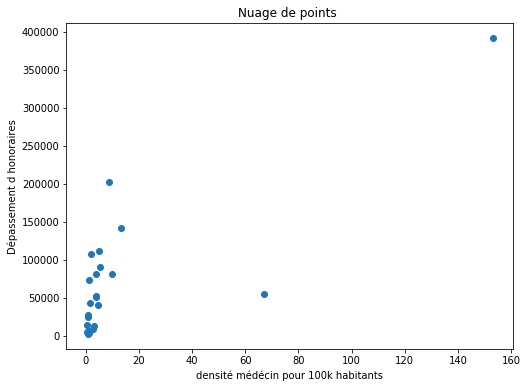

In [16]:
densite_med = tab['FRANCE ENTIERE']
depassement = tab['dep_mon']
title = 'Nuage de points '
xlabel = 'densité médécin pour 100k habitants'
ylabel = 'Dépassement d honoraires'
fig = plt.figure(figsize=(8, 6))
plt.plot(densite_med, depassement, 'o')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

Text(0.5, 1.0, "Dépassement d'honorarires par spécialité en France")

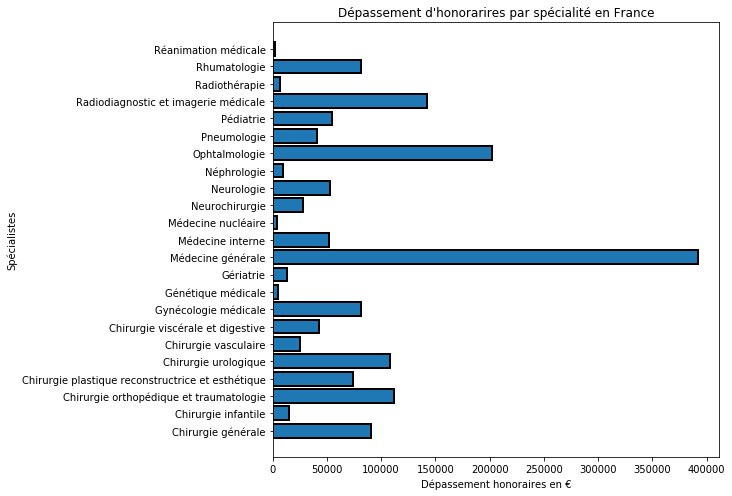

In [20]:
fig = plt.figure(figsize=(8, 8))
plt.barh(tab['specialite_nom'], depassement, edgecolor='black', linewidth = 2)
xlabel = 'Dépassement honoraires en €'
ylabel = 'Spécialistes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Dépassement d'honorarires par spécialité en France")

Text(0.5, 1.0, "Dépassement d'honorarires par densité de spécialistes en France")

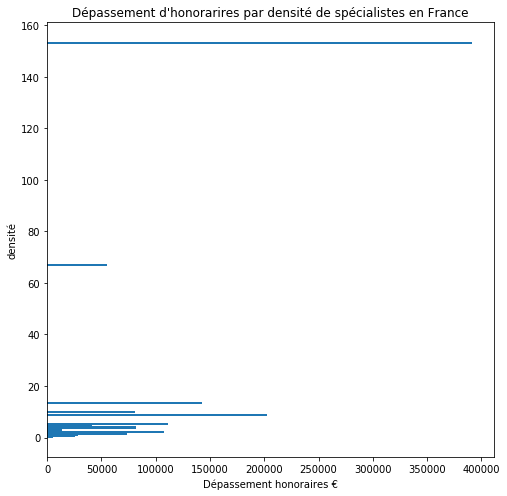

In [22]:
fig = plt.figure(figsize=(8, 8))
plt.barh(densite_med, depassement, linewidth = 2)
xlabel = 'Dépassement honoraires €'
ylabel = 'densité'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Dépassement d'honorarires par densité de spécialistes en France")

### 4- Calcul du coefficient de pearson

In [19]:
## Coefficient de pearson
corr = pearsonr(densite_med, depassement)
corr[0]

0.782229995543185